###Import packages and dtaset. Explore the data:

In [1]:
#Import packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib 
import sklearn

In [2]:
#Import dataset
from sklearn.datasets import load_boston
bdata = load_boston()

In [3]:
#Explore the dataset
print bdata.data.shape
print bdata.keys()
print bdata.feature_names
print bdata.target.shape

(506, 13)
['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)


##Part 1: Descriptive analysis

###1.1: Histogram of housing prices

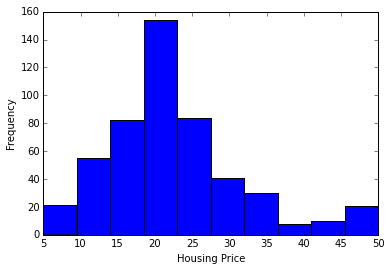

In [27]:
#Draw histgram to show the mediam house price trendy
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(bdata.target)
plt.xlabel('Housing Price')
plt.ylabel('Frequency')

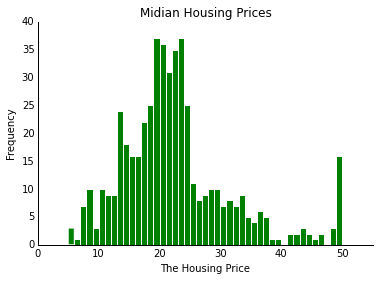

In [42]:
#More details
max = bdata.target.max()
min = bdata.target.min()
#Plotting

plt.hist(bdata.target, bins = max - min, facecolor = 'g', edgecolor = 'white')
plt.axis([min-5, max+5, 0, 40])
plt.xlabel('The Housing Price')
plt.ylabel('Frequency')
plt.title("Midian Housing Prices")

#Polishing
ax = plt.gca()
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

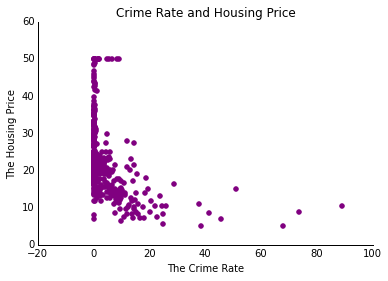

In [62]:
#Scatter plot to show the correlation between the housing price and crime rate

crime = bdata.data[:,0]
plt.scatter(crime, bdata.target, color='purple')
plt.xlabel('The Crime Rate')
plt.ylabel('The Housing Price')
plt.title('Crime Rate and Housing Price')

#Ploshing
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

##Part2: Experimental Setup

###2.1 Create a function to compute the Root Mean Squared Error for a list of numbers

In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
import numpy as np

def compute_rmse(predictions, yvalues):
    p = np.array(predictions)
    y = np.array(yvalues)
    
    rmse = ((p-y)**2).sum()*1.0/len(p)
    rmse = np.sqrt(rmse)
    
    return rmse

print compute_rmse((2,2,3),(0, 2, 6))

2.08166599947


###2.2 Divided the dataset into training and testing dataset

In [5]:
#Create a random range
n = len(bdata.data)
new_range = [i for i in range(n)]
np.random.shuffle(new_range)

#Randomly select 66% of the data and put this in a traiing dataset(call this 'bdata_train'), 
#others as testing dataset, call this 'bdata_test'

train_index = new_range[0:int(0.66*n)]
test_index = [i for i in new_range if i not in train_index]

bdata_train = bdata.data[train_index]
btarget_train = bdata.target[train_index]
bdata_test = bdata.data[test_index]
btarget_test = bdata.target[test_index]

print bdata_train.shape
print bdata_test.shape
print btarget_train.shape
print btarget_test.shape

(333, 13)
(173, 13)
(333,)
(173,)


##Part3: Nearest Neighbor

###3.1 Nearest Neighbor: Distance function

In [6]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
def distance(X1, X2, L):
    X1 = np.array(X1)
    X2 = np.array(X2)
    
    dist = ((X2-X1)**L).sum()
    dist = np.power(dist, 1.0/L)
    return dist

print distance((3,4),(5,9),1)

7.0


###3.2 Basic Nearest Neighbor algorithm

In [7]:
def nneighbor(x_train, x_test, y_train, y_test, L):
    
    #Declare arrays
    X_TRAIN = np.array(x_train)
    X_TEST = np.array(x_test)
    Y_TRAIN = np.array(y_train)
    Y_TEST = np.array(y_test)
    Y_HAT = np.zeros(len(Y_TEST), dtype = float)
    
    #Iterate over test data
    for i in range(len(X_TEST)):
        tem_output = 0.0
        min_dist = float("inf")
        
        for j in range(len(X_TRAIN)):
            dist = distance(X_TRAIN[j], X_TEST[i], L)
            if (dist < min_dist):
                min_dist = dist
                tmp_output = Y_TRAIN[j]
        
        Y_HAT[i] = tmp_output
        
    
    #Compute error
    rmse = compute_rmse(Y_HAT, Y_TEST)
    return rmse

nn_rmse = nneighbor(bdata_train[:,(0,5)], bdata_test[:,(0,5)], btarget_train, btarget_test, 2)
print "Nearest Neighbor test data rmse =", nn_rmse


Nearest Neighbor test data rmse = 7.35974050812


###3.3 Results and Normalization

In [9]:
#Create the normalization function

def normalize(raw_data):
    #initialize array
    raw = np.array(raw_data)
    normalized_data = np.zeros_like(raw)
    
    #Calculate the mean, std
    mean = raw.mean(axis = 0)
    std = raw.std(axis = 0)
    normalized_data = (raw-mean)*1.0/std
    
    return normalized_data

#Normalize the data arrays
nor_bdata_train = normalize(bdata_train)
nor_bdata_test = normalize(bdata_test)

nor_nn_rmse = nneighbor(nor_bdata_train, nor_bdata_test, btarget_train, btarget_test, 3)
print "Normalized Nearest Neighbor test data rmse is:",nor_nn_rmse

Normalized Nearest Neighbor test data rmse is: 11.157394707


###3.4 Optimization by changing L values and adding more features

In [10]:
#NN with AGE and TAX
nn1 = nneighbor(nor_bdata_train[:,(6,9)], nor_bdata_test[:,(6,9)], btarget_train, btarget_test, 2)
print "NN, AGE-TEX, L=2:", nn1

nn2 = nneighbor(nor_bdata_train[:,(6,9)], nor_bdata_test[:,(6,9)], btarget_train, btarget_test, 12)
print "NN, AGE-TEX, L=12:", nn2



#NN with CHAS-NOX-AGE-TEX-B
nn3_1 = nneighbor(nor_bdata_train[:,(3,6,5,9,11)], nor_bdata_test[:,(3,6,5,9,11)], btarget_train, btarget_test, 1)
print "NN, CHAS-NOX-AGE-TEX-B, L=1:", nn3_1

nn3 = nneighbor(nor_bdata_train[:,(3,6,5,9,11)], nor_bdata_test[:,(3,6,5,9,11)], btarget_train, btarget_test, 2)
print "NN, CHAS-NOX-AGE-TEX-B, L=2:", nn3

nn4 = nneighbor(nor_bdata_train[:,(3,6,5,9,11)], nor_bdata_test[:,(3,6,5,9,11)], btarget_train, btarget_test, 3)
print "NN, CHAS-NOX-AGE-TEX-B, L=3:", nn4


#NN with all features
nn5 = nneighbor(nor_bdata_train[:,], nor_bdata_test[:,], btarget_train, btarget_test, 2)
print "NN, all features, L=2:", nn5

nn6 = nneighbor(nor_bdata_train[:,], nor_bdata_test[:,], btarget_train, btarget_test, 1)
print "NN, all features, L=1:", nn6

NN, AGE-TEX, L=2: 10.1246822543
NN, AGE-TEX, L=12: 10.4761551434
NN, CHAS-NOX-AGE-TEX-B, L=1: 29.0953535015
NN, CHAS-NOX-AGE-TEX-B, L=2: 5.22773285005
NN, CHAS-NOX-AGE-TEX-B, L=3: 7.21082599712
NN, all features, L=2: 5.08160572684
NN, all features, L=1: 14.8027005035


###3.5 K-Nearest Neighbors Algorithm

In [24]:
def knn3(trainingSet, testInstance, y_test, y_train, L, col, k):
    dist = [] #The distance
    l = []
    d = {}
    neighbor = []
    y_pred = []
    sumb = 0
    
    #Calculate all the distance between the test intances and every instances in the training dataset.
    for i in range(len(testInstance)):
        for j in range(len(trainingSet)):
            dis = distance([trainingSet[j,col[m]]for m in range(len(col))], [testInstance[i,col[m]]for m in range(len(col))],L)
            dist.append((i, dis, y_train[j]))
            
    #Sort the list of distance
    sorted_x = sorted(dist)
    
    #Get the top k smaller distance for each test instance
    for m in range(0, len(sorted_x), len(trainingSet)):
        for i in range(k):
            l.append(sorted_x[m+i])
    
    #Get K neighbors:
    neighbor = [row[2]for row in l] 
    
    
    #Get the average y_prediction values in all neighbors
    for i in range(0, len(neighbor), k):
        sumb = 0
        for j in range(k):
            sumb += neighbor[i+j]
        avg = float(sumb)/k
        y_pred.append(avg)
    rmse = compute_rmse(y_pred, y_test)
    return rmse

#Parse values to parameters

knn_rmse = knn3(nor_bdata_train, nor_bdata_test, btarget_test, btarget_train, 3, (0,5), 3)

print "The normalized knn-rmse is:", knn_rmse

The normalized knn-rmse is: 6.50840620403


###3.6 Using Croos Validation to find K

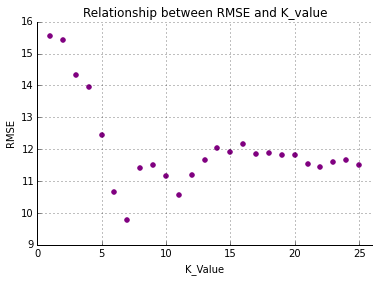

In [28]:
def crossValidation_new(data, L, col,k):
    #Normalize dataset
    nor_data = normalize(data)
    [c,r] = nor_data.shape
    n = [i for i in range(c)] 
    #Create shuffled list used as index
    np.random.shuffle(n) 
    #Create new dataset with shuffled rows
    nor_xnew = nor_data[n,:] 
    nor_ynew = btarget_train[n]
    length = len(nor_xnew)
    p = int(0.1*length)
    suma = 0
    #Use for loop to rotate the test index in the whole dataset
    for i in range(0, length, p):
        test_index = n[i:i+p]
        train_index = [i for i in n if i not in test_index]
        if len(test_index) < p: #Break the for loop if test index is less than 10 percent of whole list
            break
        trainingSet = nor_xnew[train_index,:]
        testInstance = nor_xnew[test_index,:]
        y_test = nor_ynew[test_index]
        y_train = nor_ynew[train_index]
        rmse = knn3(trainingSet, testInstance, y_test, y_train, L, col, k)
        suma += rmse
    avg = suma/10.0
    return avg
"""
Function
--------
choose
    Give a k value then plot the result to show the pattern of RMSE in the range of k

Parameters
----------
k: int
    Number of the nearest k neighbors
    
Returns
-------
Plot to show the relationship between the k value and RMSE
    
"""
def choose(k):
    d = {}
    for i in range(1,k+1):
        rmse = crossValidation_new(bdata_train, L = 1, col = [0,5], k = i)
        d[i] = rmse
    #Make a graph to show the pattern of RMSE and k-value
    k_value = [key for key in d]
    rmse = [d[key] for key in d ]
    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.tick_params(top = "off", right = "off")
    #Change the color of the bars to be green and change the bin width to be $1000
    plt.scatter(k_value, rmse, color = 'purple')
    #Add x and y labels
    plt.ylabel("RMSE")
    plt.xlabel("K_Value")
    plt.xlim([0,26])
    plt.title('Relationship between RMSE and K_value')  
    plt.grid()  
    plt.show()
choose(25)
